In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./possum (2).csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.shape

(104, 14)

In [6]:
df.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

### Filling the null values

In [7]:
df.age.fillna(df.age.mean(), inplace= True)
df.footlgth.fillna(df.footlgth.mean(), inplace= True)

### Univariate analysis

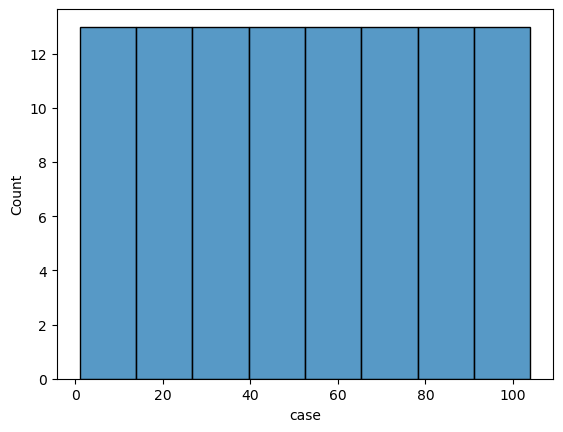

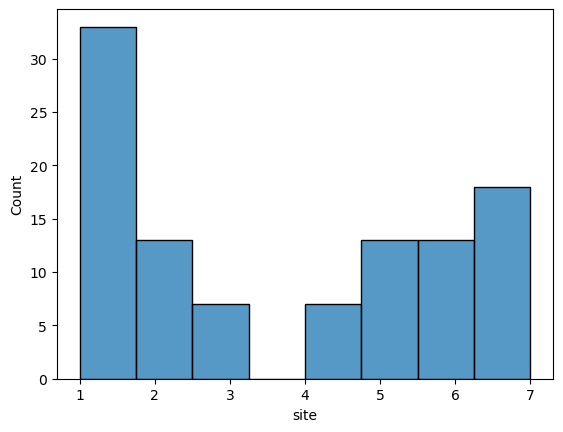

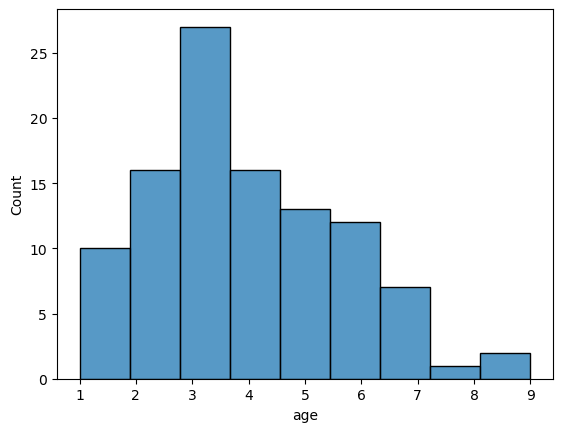

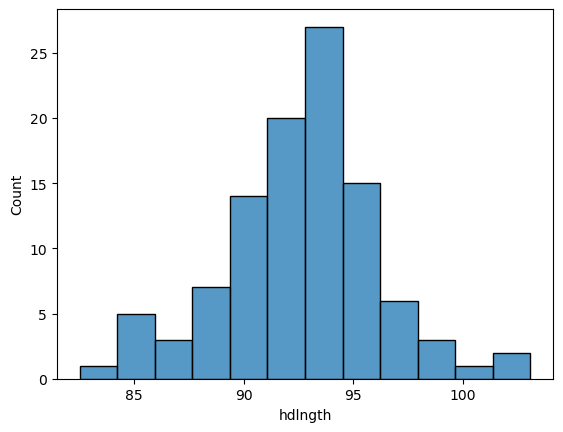

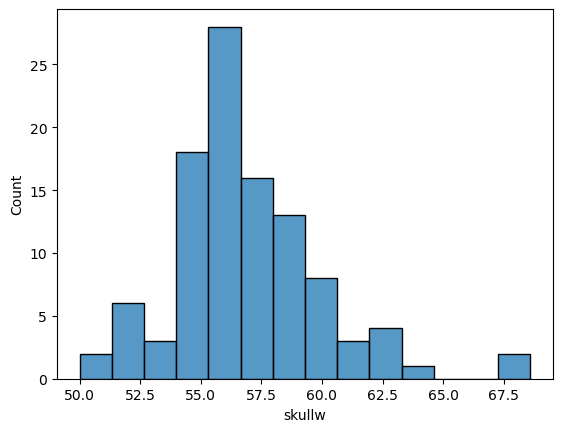

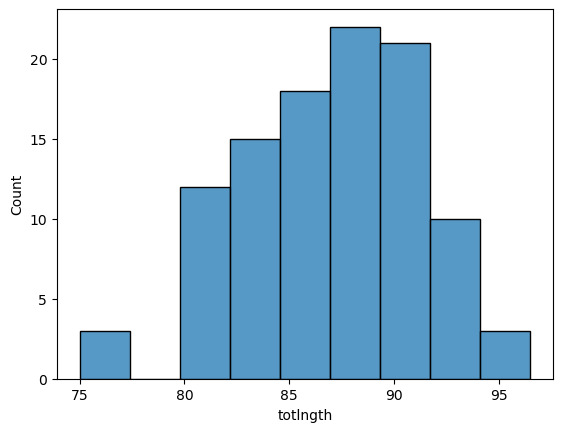

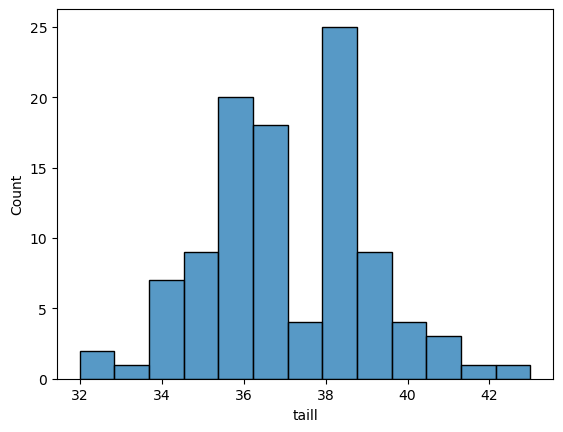

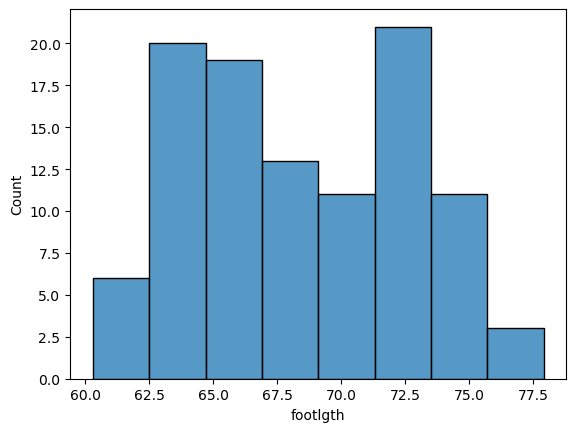

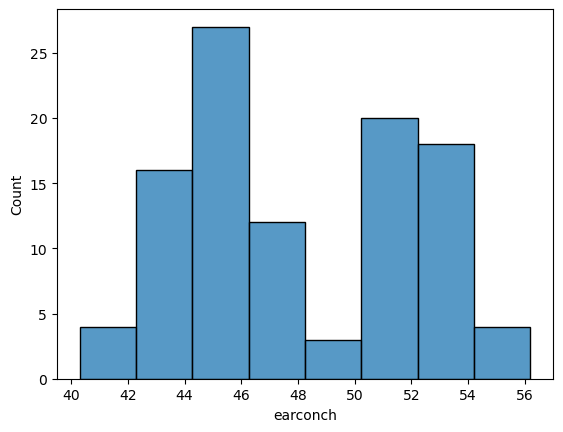

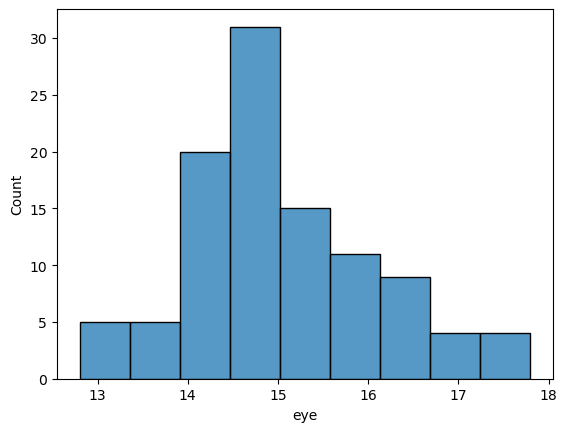

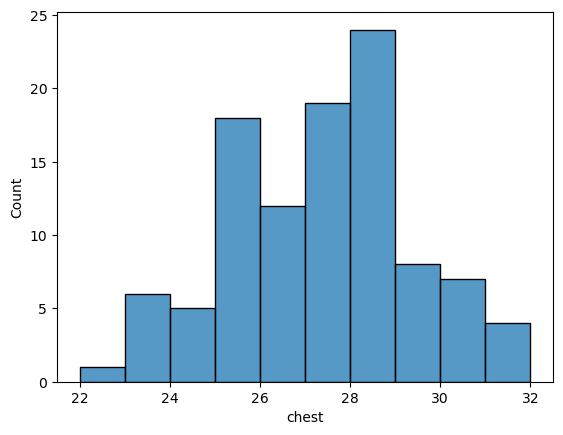

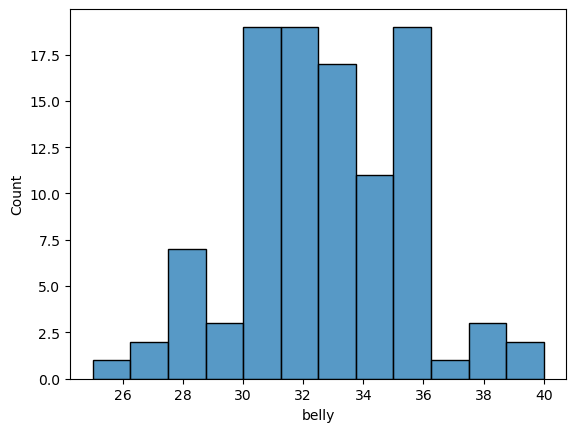

In [8]:
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.histplot(x = df[i])
        plt.show()

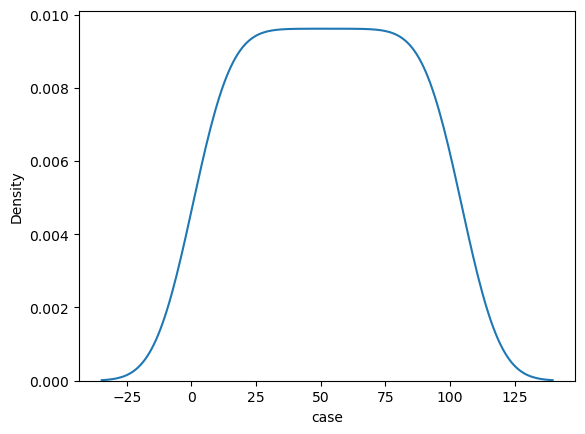

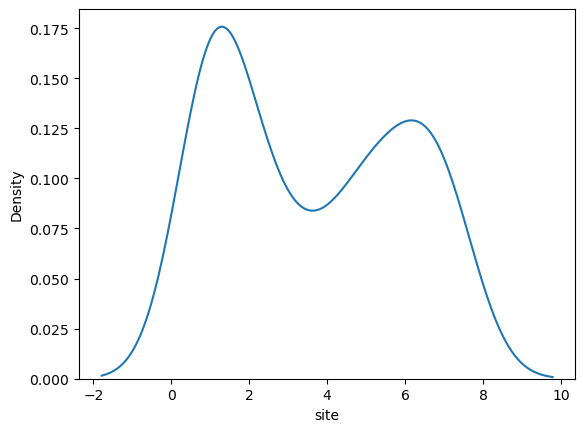

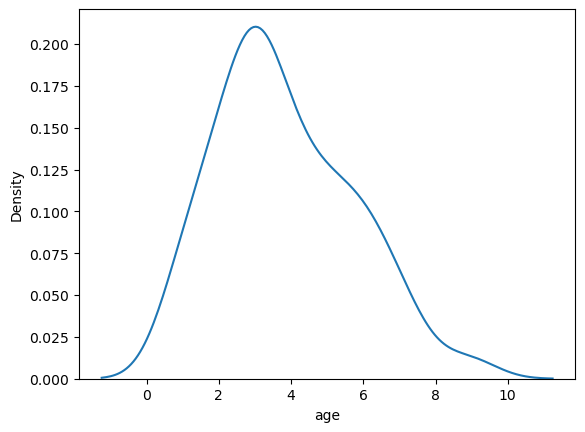

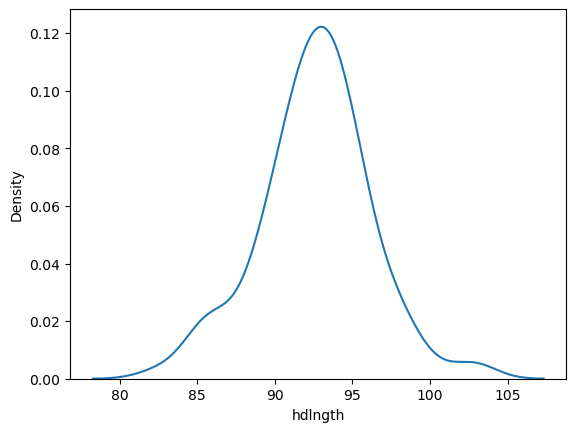

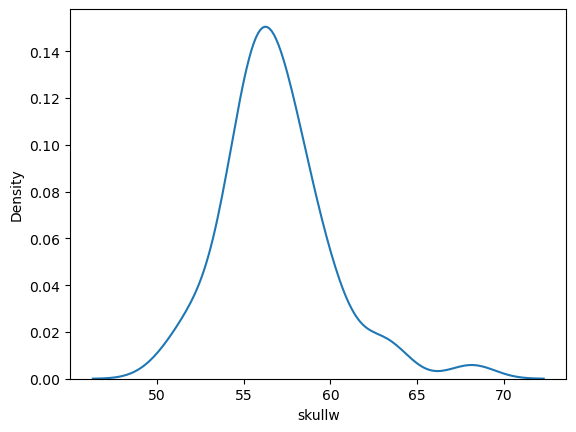

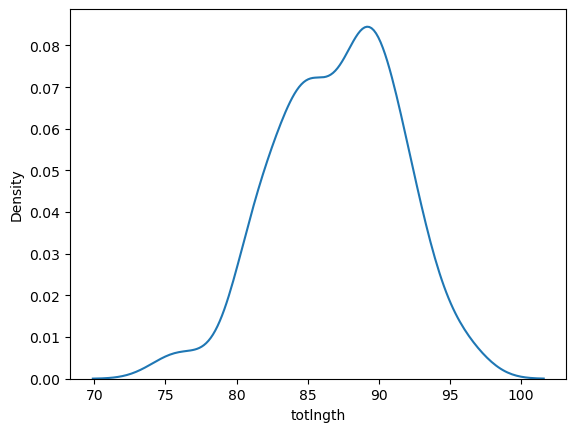

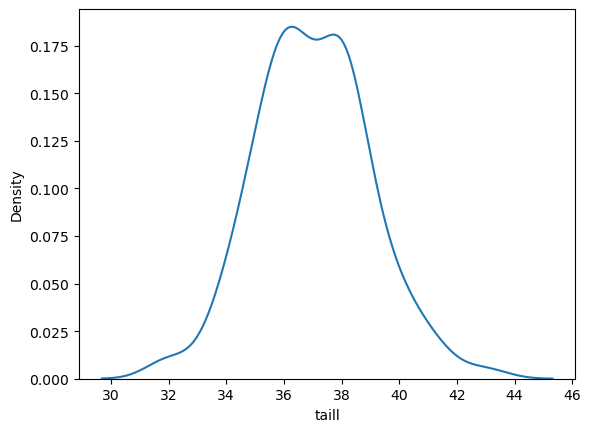

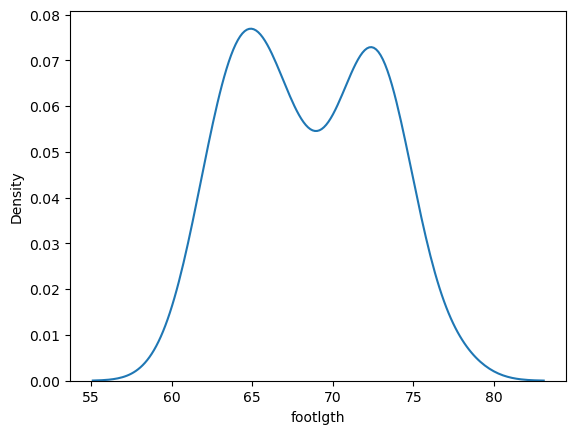

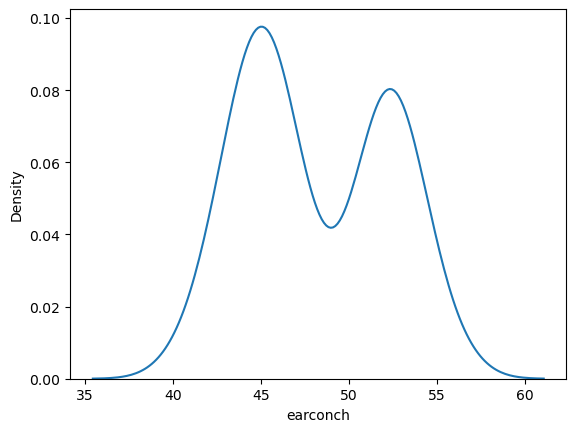

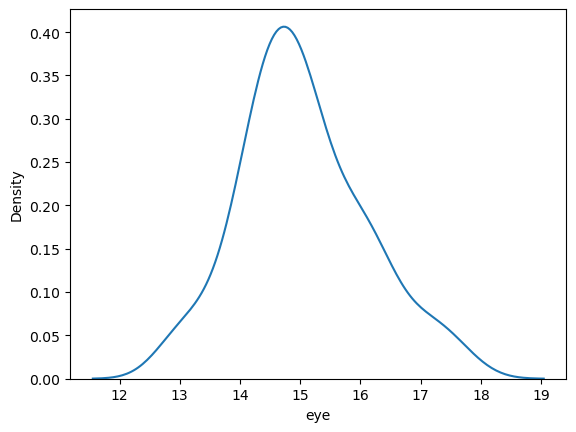

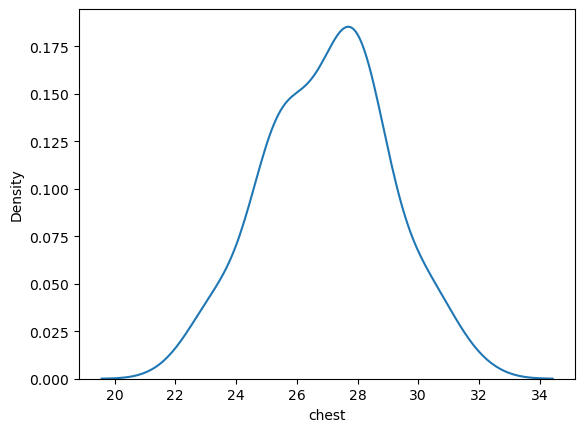

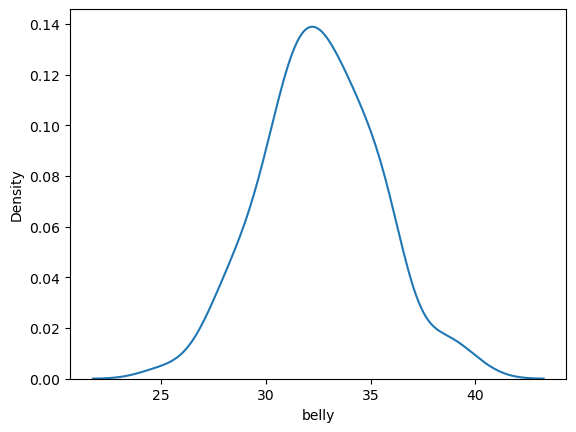

In [9]:
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.kdeplot(x = df[i])
        plt.show()

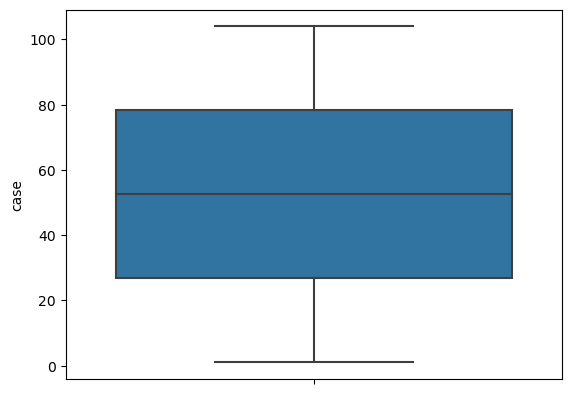

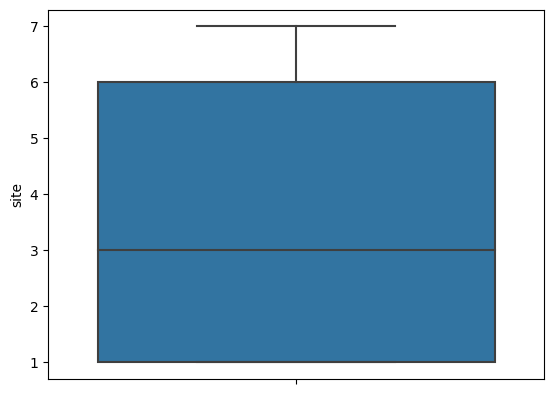

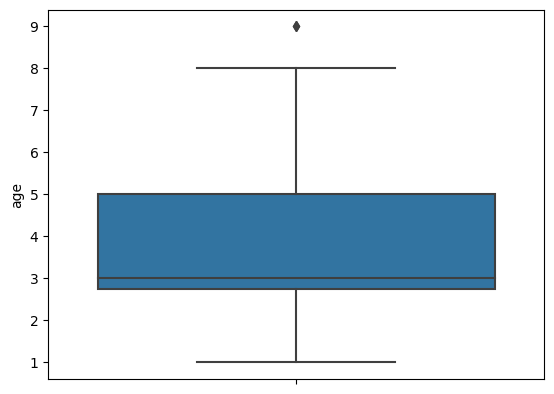

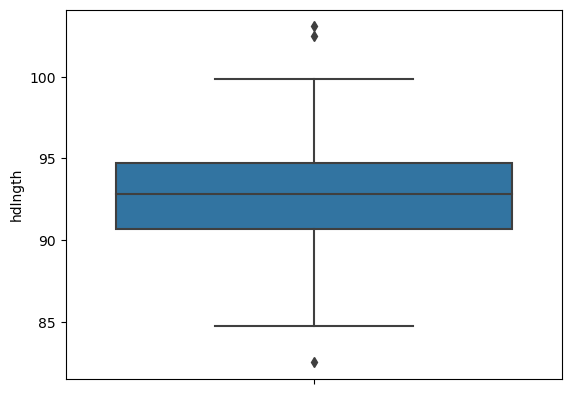

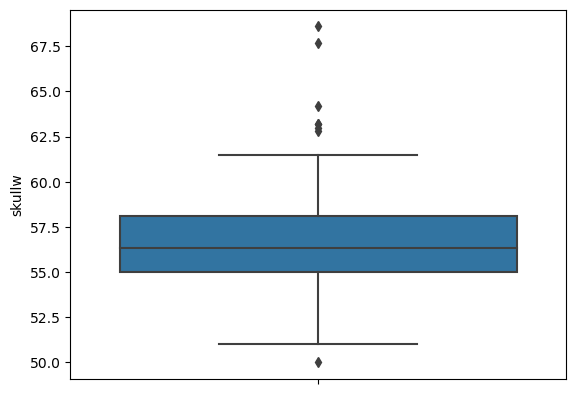

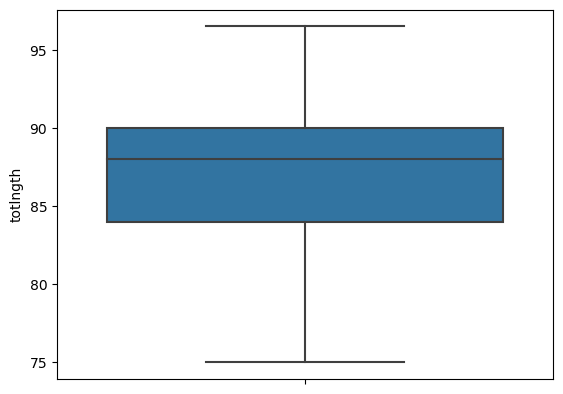

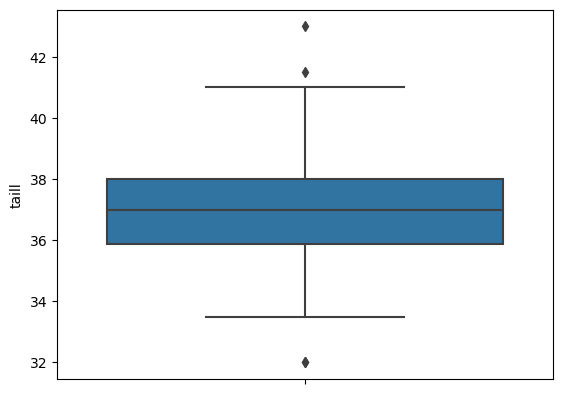

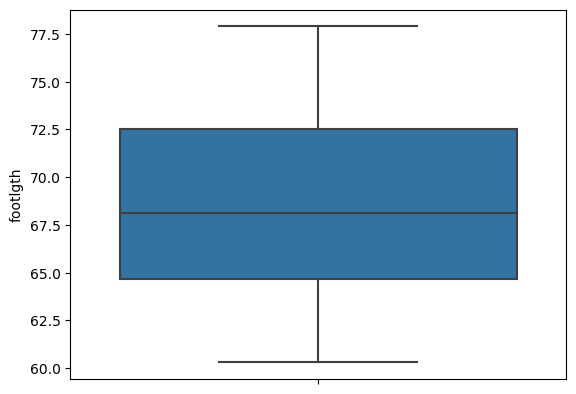

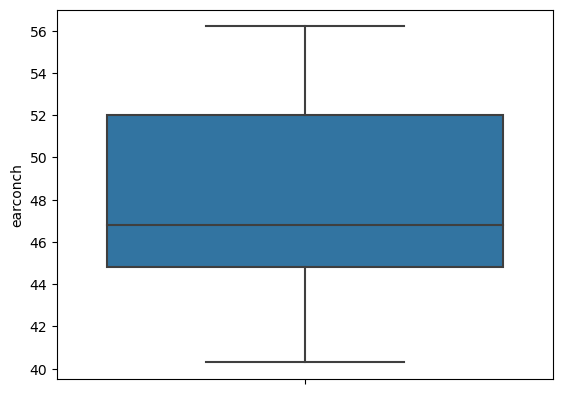

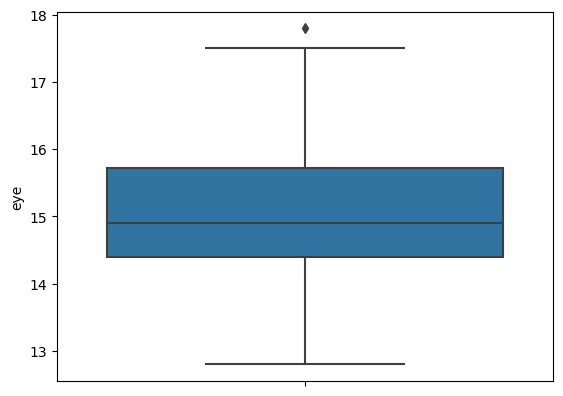

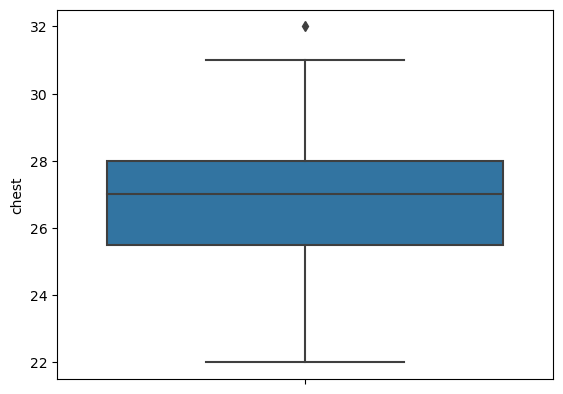

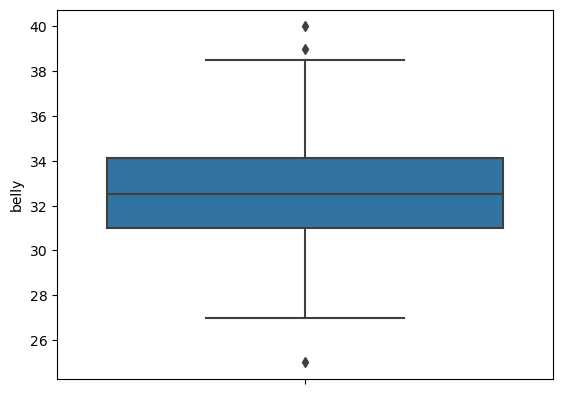

In [10]:
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.boxplot(y = df[i])
        plt.show()

### LabelEncoding the Categorical columns

In [11]:
le = LabelEncoder()

In [12]:
for i in ['Pop', 'sex']:
    df[i] = le.fit_transform(df[i])

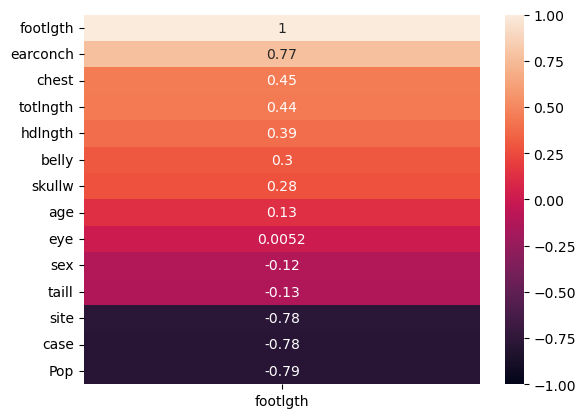

In [13]:
sns.heatmap(df.corr()[['footlgth']].sort_values(by = 'footlgth', ascending= False), vmin= -1, vmax= 1, annot= True)
plt.show()

In [14]:
x = df[['earconch', 'chest', 'totlngth', 'hdlngth' ,'belly']].values

In [15]:
y = df[['footlgth']].values

### Feature Scaling

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x)

### Model Building

In [18]:
models = {
   'LinearRegression' :LinearRegression(),
   'DecisionTreeRegressor' :DecisionTreeRegressor(),
   'RandomForestRegressor' :RandomForestRegressor(),
   'AdaBoostRegressor' :AdaBoostRegressor(),
   'GradientBoostingRegressor' :GradientBoostingRegressor(),
   'HistGradientBoostingRegressor' :HistGradientBoostingRegressor(),
   'LinearSVR' :LinearSVR()
}

In [19]:
for name, model in models.items():
    scores = cross_val_score(model, x , y , scoring='neg_mean_squared_error', cv = 10, n_jobs= -1)
    print("Cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("Average RMSE :", rmse_average)
    print("*"*100)

Cross validation model : LinearRegression
Average RMSE : 2.3276359484323152
****************************************************************************************************
Cross validation model : DecisionTreeRegressor
Average RMSE : 3.002208163198082
****************************************************************************************************
Cross validation model : RandomForestRegressor
Average RMSE : 2.2738547508075357
****************************************************************************************************
Cross validation model : AdaBoostRegressor
Average RMSE : 2.505212167704372
****************************************************************************************************
Cross validation model : GradientBoostingRegressor
Average RMSE : 2.483130000214279
****************************************************************************************************
Cross validation model : HistGradientBoostingRegressor
Average RMSE : 2.359667016747083
**********

### We can see that RandomForestRegressor is having the best overall performance so far. We may proceed with it.

In [20]:
model = RandomForestRegressor()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .20, shuffle= True, random_state= 42)

In [22]:
model.fit(x_train, y_train)
print("Model trained with RandomForestRegressor")
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
score = r2_score(y_test, model.predict(x_test))*100
mae = mean_absolute_error(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))
rmse = np.sqrt(mse)

print("training score :", training_score)
print("testing score :", testing_score)
print("r2score :", r2_score)
print("mae :", mae)
print("mse ;", mse)
print("rmse :", rmse)
print('*'*100)

Model trained with RandomForestRegressor
training score : 96.51864494155575
testing score : 63.02035751546773
r2score : <function r2_score at 0x0000016513EF8790>
mae : 1.7827424872861577
mse ; 6.22748919008566
rmse : 2.49549377680764
****************************************************************************************************


In [23]:
predict = model.predict(x)

In [24]:
actual = df.footlgth.values

In [25]:
PREDICT = pd.DataFrame(zip(actual, predict), columns= ("Actual", 'Prediction'))

In [26]:
PREDICT.head()

,Actual,Prediction
0,74.5,73.193
1,72.5,72.035
2,75.4,75.277
3,76.1,74.976
4,71.0,71.245


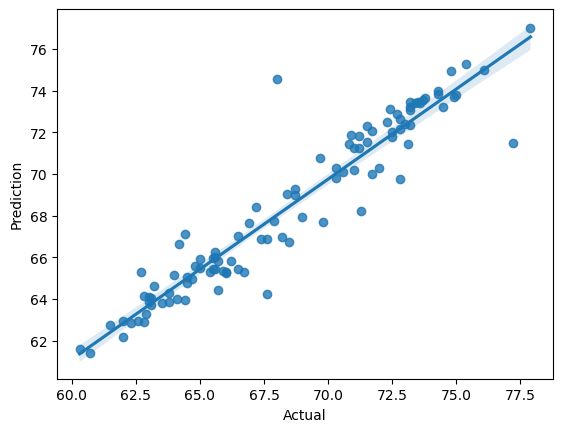

In [27]:
sns.regplot(data = PREDICT, x = 'Actual', y = 'Prediction');